In [12]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
#reading the dataframe
df = pd.read_csv('C:\\Users\\Admin\Desktop\\IIT Delhi\\Linear Regression\\Medical Price Dataset.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df.dtypes



age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


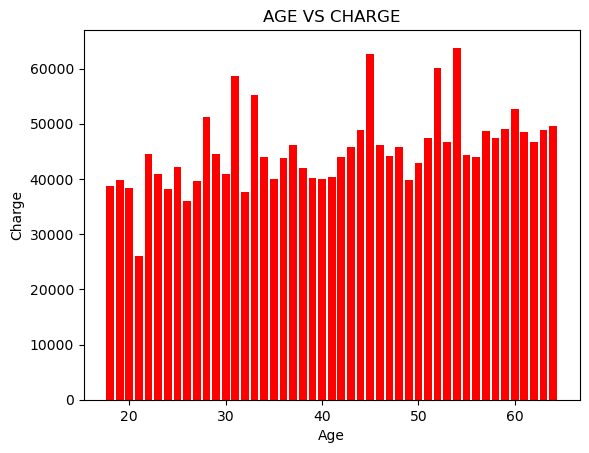

In [42]:
c = list(df["charges"])
a = list(df["age"])
# creating the bar plot
plt.bar(a, c, color ='red')
plt.xlabel("Age")
plt.ylabel("Charge")
plt.title("AGE VS CHARGE")
plt.show()



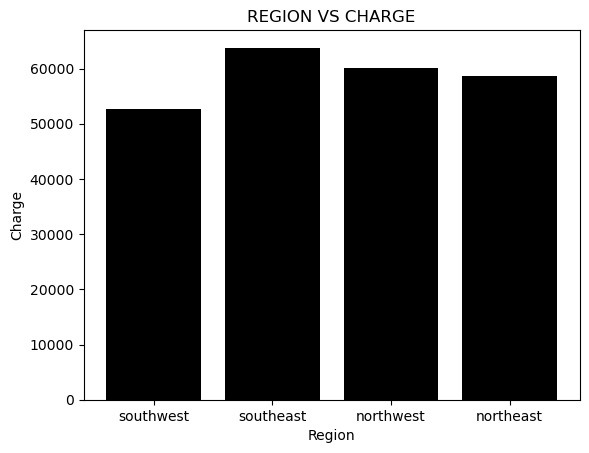

In [43]:
r = list(df["region"])
c = list(df["charges"])

 
# creating the bar plot
plt.bar(r, c, color ='black')
 
plt.xlabel("Region")
plt.ylabel("Charge")
plt.title("REGION VS CHARGE")
plt.show()

 

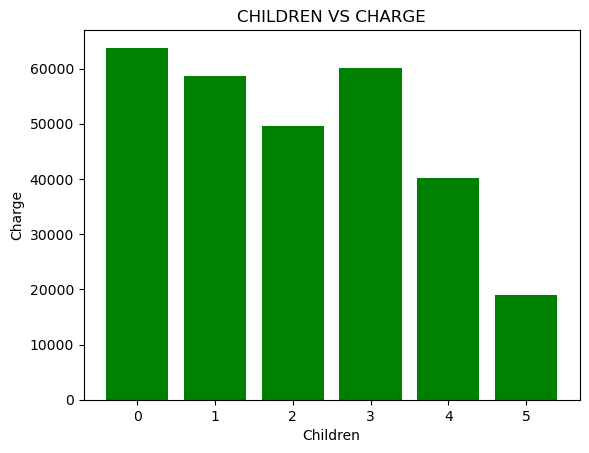

In [44]:
 
c = list(df["charges"])
ch = list(df["children"])
# creating the bar plot
plt.bar(ch, c, color ='green')
 
plt.xlabel("Children")
plt.ylabel("Charge")
plt.title("CHILDREN VS CHARGE")
plt.show()


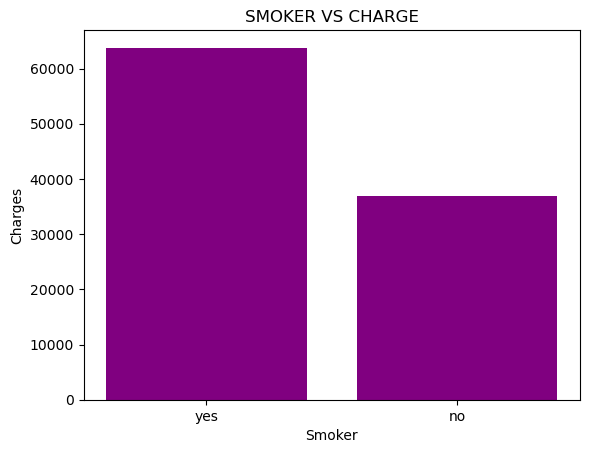

In [45]:
c = list(df["charges"])
s = list(df["smoker"])
# creating the bar plot
plt.bar(s, c, color ='purple')
 
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.title ('SMOKER VS CHARGE')
plt.show()

In [10]:
# Perform one-hot encoding for categorical variables
df_new = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

# Display the first few rows of the encoded dataset
df_new.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [16]:
x = df_new.drop(['charges'], axis = 1)
y = df_new['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [17]:
def linearregress(x_train, y_train):
    # Add a column of ones to x_train for the intercept term
    ones = np.ones((x_train.shape[0], 1))
    x_train = np.concatenate((ones, x_train), axis=1)
    
    # Calculate the coefficients using the normal equation
    x_transpose = np.transpose(x_train)
    x_transpose_dot_x = np.dot(x_transpose, x_train)
    x_transpose_dot_y = np.dot(x_transpose, y_train)
    coefficients = np.linalg.solve(x_transpose_dot_x, x_transpose_dot_y)
    
    return coefficients

In [18]:
coeff = linearregress(x_train, y_train)


In [37]:
def r_squared(y_true, y_pred):
    mean_y = np.mean(y_true)
    ss_t = np.sum((y_true - mean_y) ** 2)
    ss_resi = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_resi / ss_t)
    return r2

In [39]:
y_pred = np.dot(np.concatenate((np.ones((x_test.shape[0], 1)), x_test), axis=1), coeff)

# Calculate R-squared score
r2 = r_squared(y_test, y_pred)
print('R-squared Score:', r2)



R-squared Score: 0.7999876970680434
